In [4]:
from keras.models import load_model
import time

from keras.layers import Input, Dense
from keras.models import Model
import keras
import theano
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv1D,Conv2D
from keras.layers import MaxPooling1D
from keras.optimizers import SGD,Adagrad,Adadelta,Adam,Adamax
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

 # for reproducibility
from keras import backend as K
directory_train = "D:\\PIL\\"
file_name_train = "deep_input_check_small_child_740_features_kfold_test_version_1.xlsx"
directory_test = "D:\\PIL\\"
file_name_test = "deep_input_check_small_child_740_features_kfold_test_version_1.xlsx"
featureDimension = 2962
accuracy_all = []
confusion_matrix_sum_all = [] 
count_even = 0;
count_odd = 1;
precision_all = []
recall_all = []
f1score_all = []

model = load_model("F:\\data_small_child_vs_animal_weights\\updated_model_fine_tuned_version_1_SCA.h5")
model.load_weights("F:\\data_small_child_vs_animal_weights\\updated_weights_fine_tuned_version_1_SCA.h5")
ff = K.function([model.layers[0].input, K.learning_phase()], [model.layers[8].output]) 

In [5]:
val_train = pd.read_excel(directory_train+file_name_train,sheetname=0)
val_test  = pd.read_excel(directory_test+file_name_test,sheetname=1)
######################################################################################################
val_data_train = val_train.iloc[:,2:featureDimension]
val_label_train = val_train.iloc[:,1]
val_data_test = val_test.iloc[:,2:featureDimension]
val_label_test = val_test.iloc[:,1]
train_data = np.array(val_data_train)
train_labels = list(val_label_train)  
#print train_labels
test_data = np.array(val_data_test)
test_labels = list(val_label_test)        
#print test_labels
#train_data = np.reshape(train_data,(262*2,))
number_of_features_one_class = 740
train_data = np.reshape(train_data,(len(train_data),4,number_of_features_one_class))
print train_data[0]
test_data = np.reshape(test_data,(len(test_data),4,number_of_features_one_class))
#print test_data[0]
#print np.shape(X)
Y = train_labels
batch_size = 25
value_out = []
#print len(train_data)
temp = ff([train_data,0])
value_out = np.squeeze(temp)
#value_out.append(temp)

print np.shape(value_out)    

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.00042419  0.00042494  0.00042527 ...,  0.          0.          0.        ]
 [-0.01073367 -0.01109301 -0.01144812 ...,  0.          0.          0.        ]]
(2143L, 256L)


2143
[[ -0.20076814  -6.71469673]
 [  6.21373209   0.86491044]
 [ -1.78943516  -7.08211159]
 ..., 
 [  2.54057325  11.14091496]
 [-14.02578888   6.12264968]
 [-13.67271533   4.59305549]]


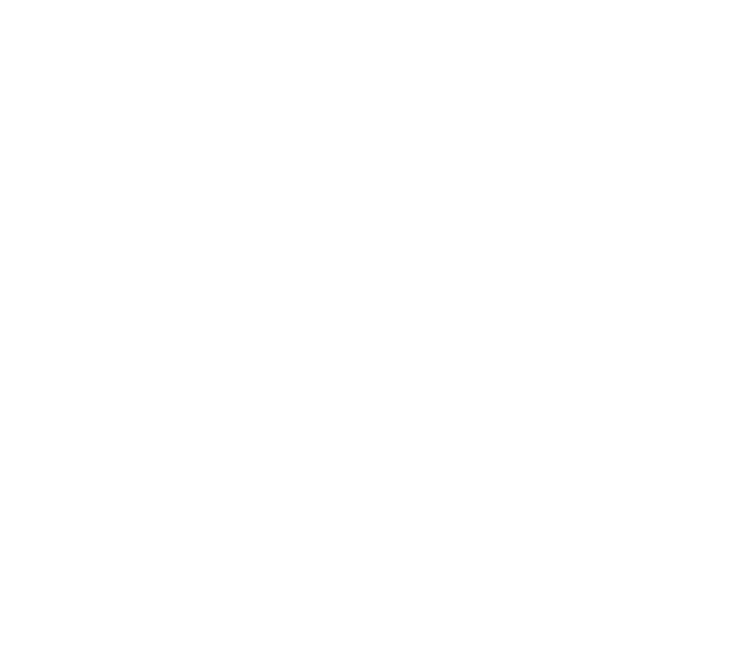

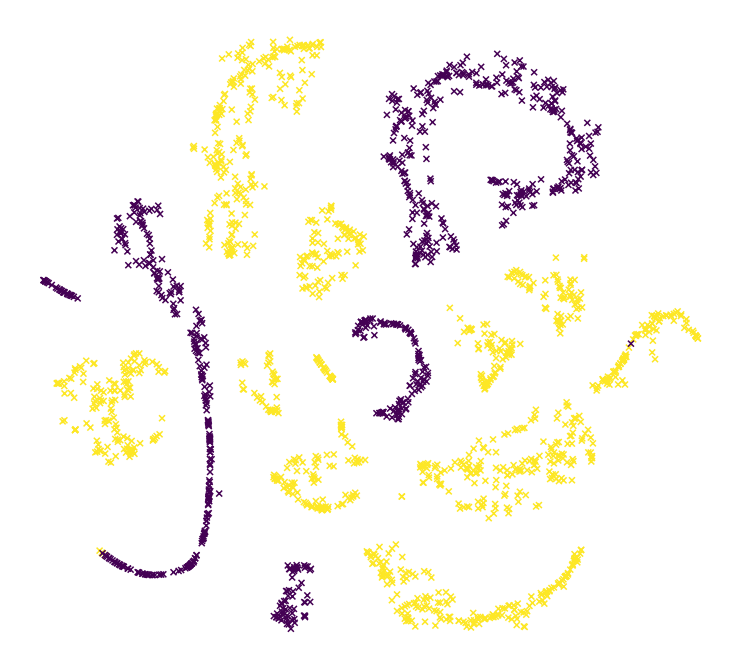

In [7]:
model_tsne = TSNE(n_components=2)
model_tsne.fit_transform(value_out)
x = model_tsne.fit_transform(value_out)
print len(x)
print(x)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,wspace=0.0, hspace=0.0)
plt.scatter(x[:,0], x[:,1],c=train_labels,marker="x")
plt.show()


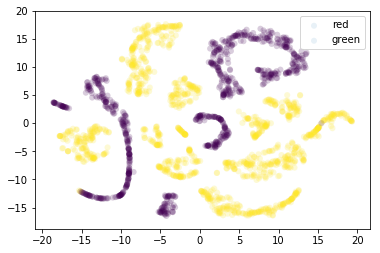

In [10]:
import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
for color in ['red', 'green']:
    ax.scatter(x[:,0], x[:,1], c=train_labels, label=color,
               alpha=0.10, edgecolors='none')

ax.legend()
#ax.grid(True)

plt.show()